In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

# local import 
import scripts.WeatherArchive as weta

In [6]:
colors = sns.palettes.color_palette('colorblind')

In [134]:
vogel = pd.read_csv("data/weather/vogel_archive_2018_2020.csv",header = 6)

vogel.index =  pd.to_datetime(vogel["Local time in Vogel"],dayfirst=True)
vogel.sort_index(inplace = True)

vogel.replace("No precipitation",0., inplace = True)
vogel.replace("Trace of precipitation",0.1, inplace = True)


Local time in Vogel
2018-08-01 07:00:00    NaN
2018-08-01 13:00:00      0
2018-08-02 07:00:00      2
2018-08-02 13:00:00      0
2018-08-03 07:00:00      0
                      ... 
2021-01-21 19:00:00    NaN
2021-01-21 20:00:00    NaN
2021-01-21 21:00:00    NaN
2021-01-21 22:00:00    NaN
2021-01-21 23:00:00    NaN
Name: RRR, Length: 20851, dtype: object

In [109]:
M17_75 = pd.read_csv("data/weather/logger_75_2018_2020.csv",header = 2)
M17_75['datetime'] = pd.to_datetime(M17_75['Date Time - GMT +01:00'].copy(),dayfirst=True)
M17_75.index = M17_75['datetime']
M17_75.columns = ['Serial','datetime_gmt','T','RH','Dewpoint','connect','button','eof','datetime']
M17_75 =M17_75.resample('H').mean().copy()

In [110]:
open_closed = {"2018-08-11":["closed","2018-01-01","2018-09-03",9,'left'],
               "2018-10-22":["open","2018-09-01","2018-12-15",20,'center'],
               "2019-06-19":["closed","2018-12-16","2019-11-01",60,'center'],
               "2020-06-30":["open","2019-11-01","2020-11-01",110,'right']}

In [137]:
t_out = vogel['T'].resample("H").mean()
t_in = M17_75['T']
rh_in = M17_75['RH']
pp_out = vogel['RRR']

s = pd.to_datetime('2018-08-10')
e = pd.to_datetime('2020-07')

/Users/AchilleTalon/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:214: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


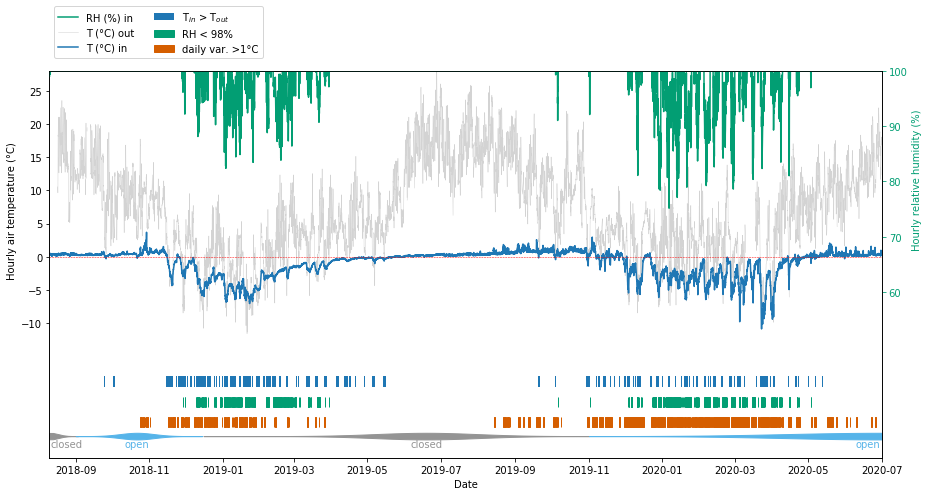

In [138]:
weta.CavePlot(t_in,t_out,rh_in,s,e,offset=-1.93,path ="../reports/M17_manuscript/figures/temperature_RH_plot.pdf",o_c = open_closed, **{"dpi":400})

In [139]:
vogel

,Local time in Vogel,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
Local time in Vogel,,,,,,,,,,,,,,,,,,,,,
2018-08-01 07:00:00,01.08.2018 07:00,20.0,NaN,NaN,NaN,57.0,Wind blowing from the east,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 13:00:00,01.08.2018 13:00,23.4,NaN,NaN,NaN,53.0,Wind blowing from the east,3.0,NaN,NaN,...,NaN,NaN,30.0,NaN,0,6.0,NaN,NaN,NaN,NaN
2018-08-02 07:00:00,02.08.2018 07:00,18.0,NaN,NaN,NaN,75.0,Wind blowing from the north,1.0,NaN,NaN,...,NaN,NaN,40.0,NaN,2,24.0,NaN,NaN,NaN,NaN
2018-08-02 13:00:00,02.08.2018 13:00,20.4,NaN,NaN,NaN,64.0,Wind blowing from the north-east,5.0,NaN,NaN,...,NaN,NaN,50.0,NaN,0,6.0,NaN,NaN,NaN,NaN
2018-08-03 07:00:00,03.08.2018 07:00,17.1,NaN,NaN,NaN,71.0,Wind blowing from the north-east,6.0,NaN,NaN,...,NaN,NaN,30.0,NaN,0,12.0,Dry (without cracks,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-21 19:00:00,21.01.2021 19:00,-0.1,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-21 20:00:00,21.01.2021 20:00,0.2,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-21 21:00:00,21.01.2021 21:00,0.2,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
vogel = pd.read_csv("data/weather/vogel_archive_2018_2020.csv",header = 6)



In [154]:
daily_RR = pd.to_numeric(vogel.loc[(vogel['tR']==24) | (vogel['tR']==6),'RRR']).resample("D").sum()

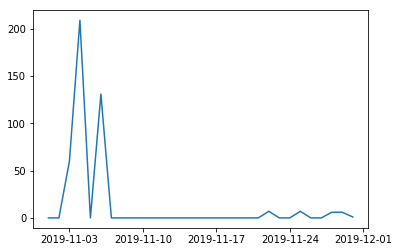

In [155]:
fig, ax = plt.subplots()

ax.plot(daily_RR["2019-11"])